In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
# loading the disbetes dataset to a pandas DataFrame
dset = pd.read_csv('Telecom_productivity.csv')

In [4]:
# printing the first 5 rows of the datasets
dset.head()

,date,quarter,day,targeted_productivity,standard_minute_value,work_in_progress,overall_using_times,incentive_package_users,idle_time,idle_men,no_of_updated,actual_productivity
0,01/01/2015,Quarter1,Thursday,0.80,26.16,1108.0,7080,98,0.0,0,0,0.940725
1,01/01/2015,Quarter1,Thursday,0.75,3.94,NaN,960,0,0.0,0,0,0.886500
2,01/01/2015,Quarter1,Thursday,0.80,11.41,968.0,3660,50,0.0,0,0,0.800570
3,01/01/2015,Quarter1,Thursday,0.80,11.41,968.0,3660,50,0.0,0,0,0.800570
4,01/01/2015,Quarter1,Thursday,0.80,25.90,1170.0,1920,50,0.0,0,0,0.800382


In [5]:
dset.tail()

,date,quarter,day,targeted_productivity,standard_minute_value,work_in_progress,overall_using_times,incentive_package_users,idle_time,idle_men,no_of_updated,actual_productivity
1192,03/11/2015,Quarter2,Wednesday,0.75,2.9,NaN,960,0,0.0,0,0,0.628333
1193,03/11/2015,Quarter2,Wednesday,0.70,3.9,NaN,960,0,0.0,0,0,0.625625
1194,03/11/2015,Quarter2,Wednesday,0.65,3.9,NaN,960,0,0.0,0,0,0.625625
1195,03/11/2015,Quarter2,Wednesday,0.75,2.9,NaN,1800,0,0.0,0,0,0.505889
1196,03/11/2015,Quarter2,Wednesday,0.70,2.9,NaN,720,0,0.0,0,0,0.394722


In [6]:
# Looking at the columns
dset.columns

Index(['date', 'quarter', 'day', 'targeted_productivity',
       'standard_minute_value', 'work_in_progress', 'overall_using_times',
       'incentive_package_users', 'idle_time', 'idle_men', 'no_of_updated',
       'actual_productivity'],
      dtype='object')

In [7]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1197 non-null   object 
 1   quarter                  1197 non-null   object 
 2   day                      1197 non-null   object 
 3   targeted_productivity    1197 non-null   float64
 4   standard_minute_value    1197 non-null   float64
 5   work_in_progress         691 non-null    float64
 6   overall_using_times      1197 non-null   int64  
 7   incentive_package_users  1197 non-null   int64  
 8   idle_time                1197 non-null   float64
 9   idle_men                 1197 non-null   int64  
 10  no_of_updated            1197 non-null   int64  
 11  actual_productivity      1197 non-null   float64
dtypes: float64(5), int64(4), object(3)
memory usage: 112.3+ KB


In [8]:
# Checking the number of missing values
dset.isnull().sum()

date                         0
quarter                      0
day                          0
targeted_productivity        0
standard_minute_value        0
work_in_progress           506
overall_using_times          0
incentive_package_users      0
idle_time                    0
idle_men                     0
no_of_updated                0
actual_productivity          0
dtype: int64

In [10]:
dset['work_in_progress'].fillna(int(dset['work_in_progress'].mean()), inplace=True)

In [11]:
dset.isnull().sum()

date                       0
quarter                    0
day                        0
targeted_productivity      0
standard_minute_value      0
work_in_progress           0
overall_using_times        0
incentive_package_users    0
idle_time                  0
idle_men                   0
no_of_updated              0
actual_productivity        0
dtype: int64

In [12]:
print(dset.quarter.value_counts())
print(dset.day.value_counts())

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64


In [13]:
# number of rows and columns in this dataset
dset.shape

(1197, 12)

In [14]:
# getting the statical measures of the data
dset.describe

<bound method NDFrame.describe of             date   quarter        day  targeted_productivity  \
0     01/01/2015  Quarter1   Thursday                   0.80   
1     01/01/2015  Quarter1   Thursday                   0.75   
2     01/01/2015  Quarter1   Thursday                   0.80   
3     01/01/2015  Quarter1   Thursday                   0.80   
4     01/01/2015  Quarter1   Thursday                   0.80   
...          ...       ...        ...                    ...   
1192  03/11/2015  Quarter2  Wednesday                   0.75   
1193  03/11/2015  Quarter2  Wednesday                   0.70   
1194  03/11/2015  Quarter2  Wednesday                   0.65   
1195  03/11/2015  Quarter2  Wednesday                   0.75   
1196  03/11/2015  Quarter2  Wednesday                   0.70   

      standard_minute_value  work_in_progress  overall_using_times  \
0                     26.16            1108.0                 7080   
1                      3.94            1190.0            

In [15]:
# loading the dataset to a pandas dataframe
p_dataframe = pd.DataFrame(dset)

In [16]:
# Print first 5 rows of dataframe
p_dataframe.head()

,date,quarter,day,targeted_productivity,standard_minute_value,work_in_progress,overall_using_times,incentive_package_users,idle_time,idle_men,no_of_updated,actual_productivity
0,01/01/2015,Quarter1,Thursday,0.80,26.16,1108.0,7080,98,0.0,0,0,0.940725
1,01/01/2015,Quarter1,Thursday,0.75,3.94,1190.0,960,0,0.0,0,0,0.886500
2,01/01/2015,Quarter1,Thursday,0.80,11.41,968.0,3660,50,0.0,0,0,0.800570
3,01/01/2015,Quarter1,Thursday,0.80,11.41,968.0,3660,50,0.0,0,0,0.800570
4,01/01/2015,Quarter1,Thursday,0.80,25.90,1170.0,1920,50,0.0,0,0,0.800382


In [17]:
# check for missing values
p_dataframe.isnull().sum()

date                       0
quarter                    0
day                        0
targeted_productivity      0
standard_minute_value      0
work_in_progress           0
overall_using_times        0
incentive_package_users    0
idle_time                  0
idle_men                   0
no_of_updated              0
actual_productivity        0
dtype: int64

In [18]:
print(dset.quarter.value_counts())
print(dset.day.value_counts())

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64


In [19]:
p_dataframe.replace({'quarter':{'Quarter1':0,'Quarter2':1,'Quarter3':2,'Quarter4':3,'Quarter5':4}},inplace=True)
p_dataframe.replace({'day':{'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Saturday':5}},inplace=True)

In [20]:
p_dataframe.head()

,date,quarter,day,targeted_productivity,standard_minute_value,work_in_progress,overall_using_times,incentive_package_users,idle_time,idle_men,no_of_updated,actual_productivity
0,01/01/2015,0,4,0.80,26.16,1108.0,7080,98,0.0,0,0,0.940725
1,01/01/2015,0,4,0.75,3.94,1190.0,960,0,0.0,0,0,0.886500
2,01/01/2015,0,4,0.80,11.41,968.0,3660,50,0.0,0,0,0.800570
3,01/01/2015,0,4,0.80,11.41,968.0,3660,50,0.0,0,0,0.800570
4,01/01/2015,0,4,0.80,25.90,1170.0,1920,50,0.0,0,0,0.800382


In [21]:
p_dataframe.tail()

,date,quarter,day,targeted_productivity,standard_minute_value,work_in_progress,overall_using_times,incentive_package_users,idle_time,idle_men,no_of_updated,actual_productivity
1192,03/11/2015,1,3,0.75,2.9,1190.0,960,0,0.0,0,0,0.628333
1193,03/11/2015,1,3,0.70,3.9,1190.0,960,0,0.0,0,0,0.625625
1194,03/11/2015,1,3,0.65,3.9,1190.0,960,0,0.0,0,0,0.625625
1195,03/11/2015,1,3,0.75,2.9,1190.0,1800,0,0.0,0,0,0.505889
1196,03/11/2015,1,3,0.70,2.9,1190.0,720,0,0.0,0,0,0.394722


In [22]:
# getting statistical measures of the data
p_dataframe.describe()

,quarter,day,targeted_productivity,standard_minute_value,work_in_progress,overall_using_times,incentive_package_users,idle_time,idle_men,no_of_updated,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,1.399332,2.469507,0.729632,15.062172,1190.269006,4567.460317,38.210526,0.730159,0.369256,0.150376,0.735091
std,1.215535,1.694506,0.097891,10.943219,1395.647280,3348.823563,160.182643,12.709757,3.268987,0.427848,0.174488
min,0.000000,0.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233705
25%,0.000000,1.000000,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,0.650307
50%,1.000000,2.000000,0.750000,15.260000,1190.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,0.773333
75%,2.000000,4.000000,0.800000,24.260000,1190.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,0.850253
max,4.000000,5.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,1.120437


<AxesSubplot:>

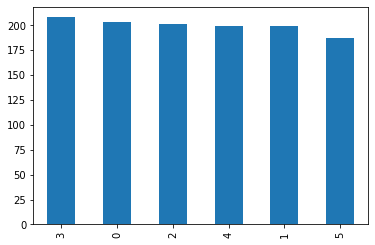

In [23]:
p_dataframe.day.value_counts().plot(kind='bar')

<AxesSubplot:>

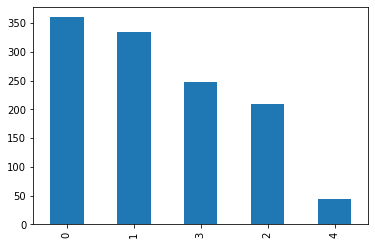

In [24]:
p_dataframe.quarter.value_counts().plot(kind='bar')

In [25]:
# Separate categorical and numerical data for simplicity in analysis
#category = p_dataframe.select_dtypes(include='object')
numerical = p_dataframe.select_dtypes(exclude='object')

In [26]:
numerical.columns

Index(['quarter', 'day', 'targeted_productivity', 'standard_minute_value',
       'work_in_progress', 'overall_using_times', 'incentive_package_users',
       'idle_time', 'idle_men', 'no_of_updated', 'actual_productivity'],
      dtype='object')

quarter


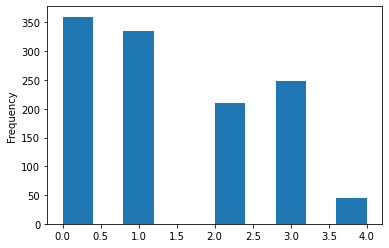

day


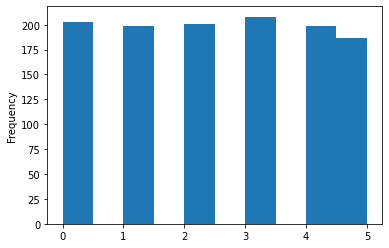

targeted_productivity


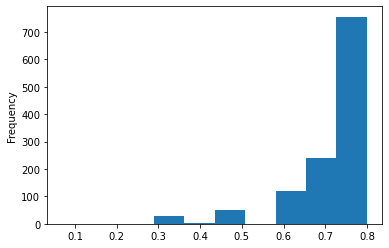

standard_minute_value


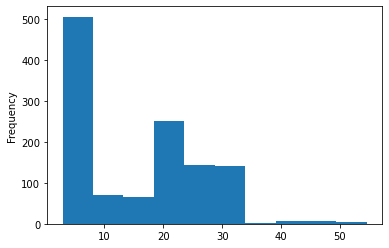

work_in_progress


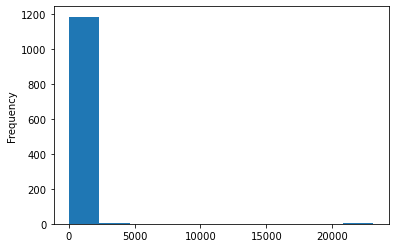

overall_using_times


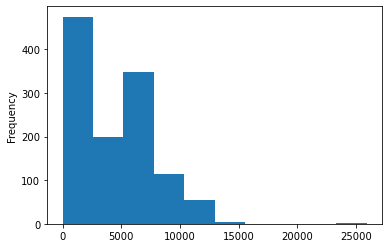

incentive_package_users


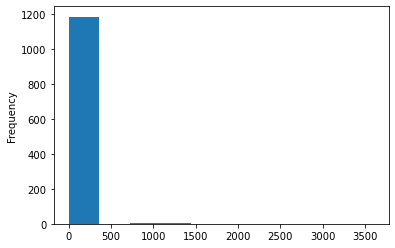

idle_time


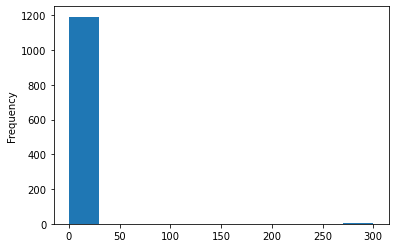

idle_men


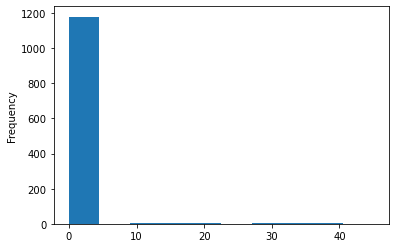

no_of_updated


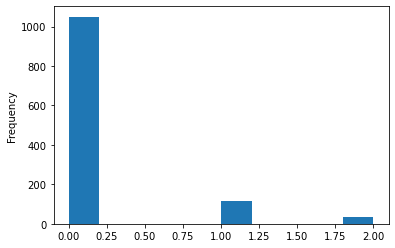

actual_productivity


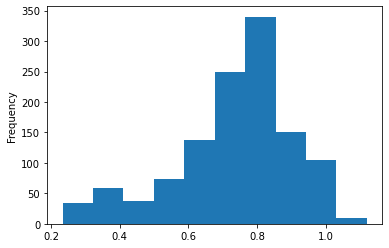

In [27]:
for i in range(len(numerical.columns)):
    print(numerical.columns[i])
    numerical.iloc[:, i].plot(kind='hist')
    plt.show()

<AxesSubplot:>

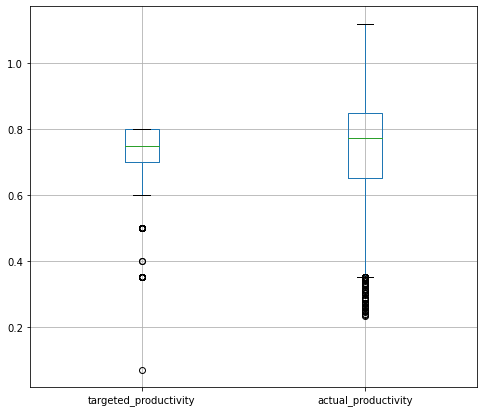

In [28]:
numerical.boxplot(column = [ 'targeted_productivity', 'actual_productivity'],figsize=(8,7))

Text(0.5, 1.0, 'average work in progress for each quaters in month')

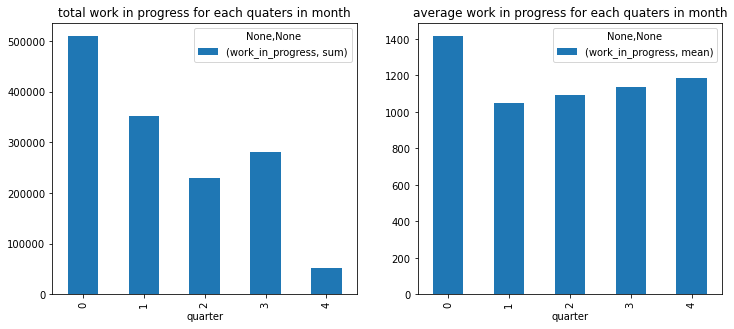

In [29]:
fig, ax = plt.subplots(ncols=2,figsize=(12,5))
p_dataframe.groupby(['quarter']).agg({'work_in_progress':['sum']}).plot(ax=ax[0], kind = 'bar')
ax[0].set_title('total work in progress for each quaters in month')
p_dataframe.groupby(['quarter']).agg({'work_in_progress':['mean']}).plot(ax=ax[1], kind = 'bar')
ax[1].set_title('average work in progress for each quaters in month')

Text(0.5, 1.0, 'average work in progress for each day')

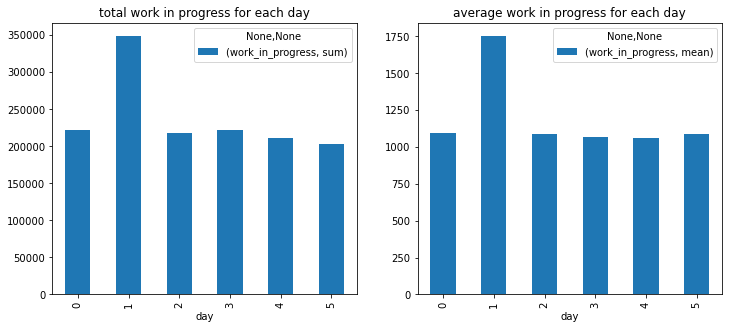

In [30]:
fig, ax = plt.subplots(ncols=2,figsize=(12,5))
p_dataframe.groupby(['day']).agg({'work_in_progress':['sum']}).plot(ax=ax[0], kind = 'bar')
ax[0].set_title('total work in progress for each day')
p_dataframe.groupby(['day']).agg({'work_in_progress':['mean']}).plot(ax=ax[1], kind = 'bar')
ax[1].set_title('average work in progress for each day')

Text(0.5, 1.0, 'average work in progress for each targeted_productivity')

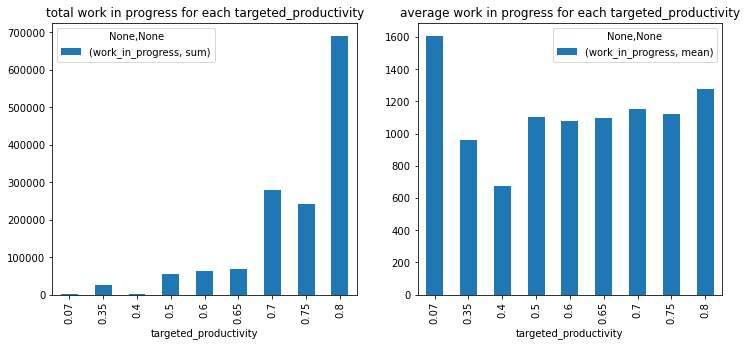

In [31]:
fig, ax = plt.subplots(ncols=2,figsize=(12,5))
p_dataframe.groupby(['targeted_productivity']).agg({'work_in_progress':['sum']}).plot(ax=ax[0], kind = 'bar')
ax[0].set_title('total work in progress for each targeted_productivity')
p_dataframe.groupby(['targeted_productivity']).agg({'work_in_progress':['mean']}).plot(ax=ax[1], kind = 'bar')
ax[1].set_title('average work in progress for each targeted_productivity')

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


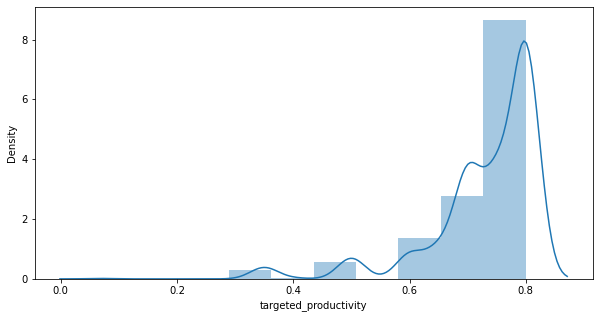

In [32]:
fig, ax = plt.subplots(1,1,figsize = (10,5))
sns.distplot(p_dataframe['targeted_productivity'], bins = 10, ax = ax)
plt.show()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


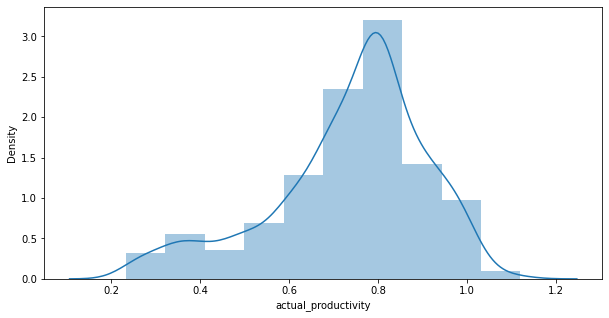

In [33]:
fig, ax = plt.subplots(1,1,figsize = (10,5))
sns.distplot(p_dataframe['actual_productivity'], bins = 10, ax = ax)
plt.show()

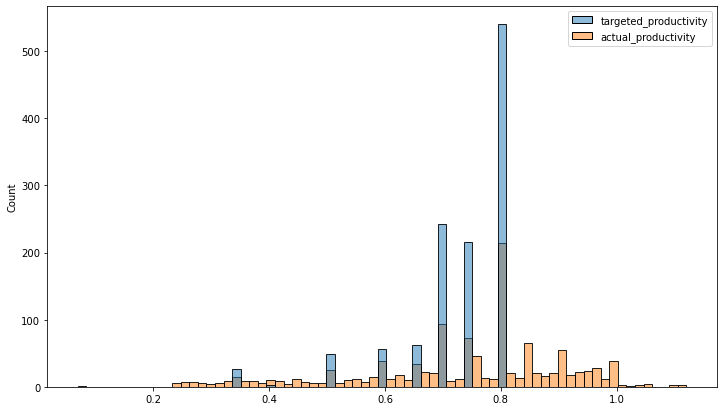

In [34]:
# import matplotlib.pyplot as plt
fig_dims = (12,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=p_dataframe[['targeted_productivity', 'actual_productivity']],ax=ax)
plt.show()

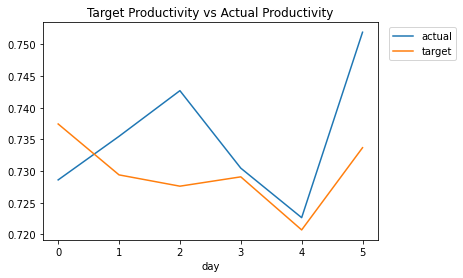

In [35]:
analysis = p_dataframe.groupby('day').agg(actual = ('actual_productivity','mean'), target = ('targeted_productivity', 'mean'))
analysis.plot(kind='line', title="Target Productivity vs Actual Productivity").legend(bbox_to_anchor= (1.02, 1));

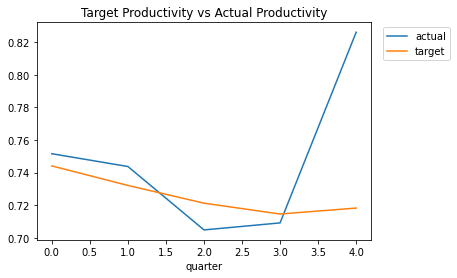

In [36]:
analysis = p_dataframe.groupby('quarter').agg(actual = ('actual_productivity','mean'), target = ('targeted_productivity', 'mean'))
analysis.plot(kind='line', title="Target Productivity vs Actual Productivity").legend(bbox_to_anchor= (1.02, 1));

In [37]:
correlation = p_dataframe.corr()

<AxesSubplot:>

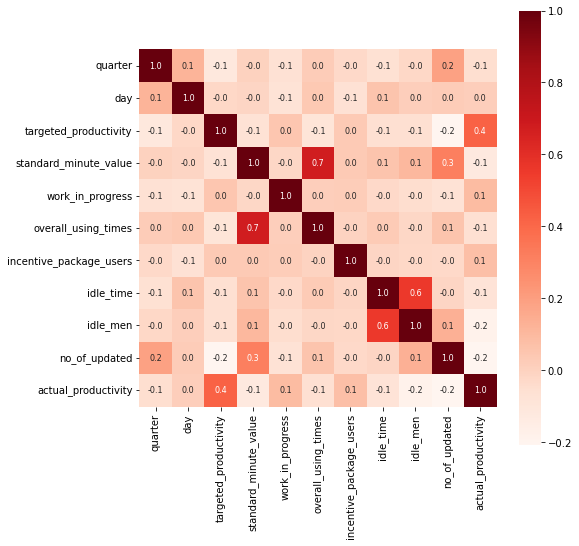

In [38]:
# create a heatmap 
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot=True, annot_kws={'size':8}, cmap = 'Reds')

In [39]:
sns.heatmap

<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

In [40]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale  = ['standard_minute_value', 'work_in_progress', 'overall_using_times', 'incentive_package_users', 'idle_time', 'idle_men','no_of_updated' ]
min_max_scaler = MinMaxScaler()
p_dataframe[cols_to_scale] = min_max_scaler.fit_transform(p_dataframe[cols_to_scale])

In [41]:
p_dataframe.head()

,date,quarter,day,targeted_productivity,standard_minute_value,work_in_progress,overall_using_times,incentive_package_users,idle_time,idle_men,no_of_updated,actual_productivity
0,01/01/2015,0,4,0.80,0.450252,0.047631,0.273148,0.027222,0.0,0.0,0.0,0.940725
1,01/01/2015,0,4,0.75,0.020132,0.051179,0.037037,0.000000,0.0,0.0,0.0,0.886500
2,01/01/2015,0,4,0.80,0.164731,0.041575,0.141204,0.013889,0.0,0.0,0.0,0.800570
3,01/01/2015,0,4,0.80,0.164731,0.041575,0.141204,0.013889,0.0,0.0,0.0,0.800570
4,01/01/2015,0,4,0.80,0.445219,0.050314,0.074074,0.013889,0.0,0.0,0.0,0.800382


In [42]:
X = p_dataframe.drop(['date','actual_productivity'],axis=1)
Y = p_dataframe['actual_productivity']

In [43]:
X.sample(5)

,quarter,day,targeted_productivity,standard_minute_value,work_in_progress,overall_using_times,incentive_package_users,idle_time,idle_men,no_of_updated
897,3,1,0.70,0.307588,0.070690,0.231481,0.011111,0.0,0.0,0.5
183,1,0,0.80,0.487418,0.032663,0.406250,0.010556,0.0,0.0,0.0
305,2,0,0.80,0.450252,0.059442,0.141204,0.013889,0.0,0.0,0.0
313,2,0,0.80,0.000000,0.051179,0.055556,0.000000,0.0,0.0,0.0
472,3,2,0.65,0.235966,0.041921,0.009259,0.006389,0.0,0.0,0.0


In [44]:
print(X)

      quarter  day  targeted_productivity  standard_minute_value  \
0           0    4                   0.80               0.450252   
1           0    4                   0.75               0.020132   
2           0    4                   0.80               0.164731   
3           0    4                   0.80               0.164731   
4           0    4                   0.80               0.445219   
...       ...  ...                    ...                    ...   
1192        1    3                   0.75               0.000000   
1193        1    3                   0.70               0.019357   
1194        1    3                   0.65               0.019357   
1195        1    3                   0.75               0.000000   
1196        1    3                   0.70               0.000000   

      work_in_progress  overall_using_times  incentive_package_users  \
0             0.047631             0.273148                 0.027222   
1             0.051179             0.03

In [45]:
Y.head(5)

0    0.940725
1    0.886500
2    0.800570
3    0.800570
4    0.800382
Name: actual_productivity, dtype: float64

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
scaler.fit(X)

StandardScaler()

In [48]:
standardized_data = scaler.transform(X)

In [49]:
print(standardized_data)

[[-1.15168784  0.90358619  0.71913683 ... -0.05747269 -0.11300466
  -0.3516175 ]
 [-1.15168784  0.90358619  0.20815097 ... -0.05747269 -0.11300466
  -0.3516175 ]
 [-1.15168784  0.90358619  0.71913683 ... -0.05747269 -0.11300466
  -0.3516175 ]
 ...
 [-0.32866077  0.31319718 -0.81382076 ... -0.05747269 -0.11300466
  -0.3516175 ]
 [-0.32866077  0.31319718  0.20815097 ... -0.05747269 -0.11300466
  -0.3516175 ]
 [-0.32866077  0.31319718 -0.3028349  ... -0.05747269 -0.11300466
  -0.3516175 ]]


In [50]:
X = standardized_data
Y = p_dataframe['actual_productivity']

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [52]:
print(X.shape, X_train.shape, X_test.shape)

(1197, 10) (837, 10) (360, 10)


In [53]:
input_shape = 10

In [54]:
metrics_Cal = pd.DataFrame(columns = [ 'Model Name','Mean Absolute Error','Mean Squared Error','R2 Squared Error'])
def evaluate_model(model,Y_actual,Y_Predicted, df): 
    mae=metrics.mean_absolute_error(Y_actual, Y_Predicted)
    mse=metrics.mean_squared_error(Y_actual, Y_Predicted)
    r2 = metrics.r2_score(Y_actual, Y_Predicted)
    df2 = {'Model Name':model,'Mean Absolute Error':mae,'Mean Squared Error':mse,'R2 Squared Error': r2}
    df = df.append(df2, ignore_index = True)
    return df

In [55]:
linear = LinearRegression()

In [56]:
linear.fit(X_train,Y_train)

LinearRegression()

In [57]:
linear_predict = linear.predict(X_test)

In [58]:
print(linear_predict)

[0.77950831 0.57506198 0.79685284 0.79092243 0.81060201 0.65139297
 2.4249754  0.72618742 0.6466439  0.75675286 0.45572576 0.68031183
 0.80597456 0.75089269 0.69174274 0.80138806 0.74702932 0.78437522
 0.78303039 0.78362279 0.80968676 0.69354315 0.77081524 0.79087233
 0.64362604 0.22867188 0.80168057 0.80706962 0.77512067 0.75453127
 0.72819083 0.71297488 0.78890662 0.79956291 0.72781862 0.74226261
 0.70216622 0.73988237 0.75224895 0.69045408 0.7728908  0.67000853
 0.69357685 0.73857049 0.63866288 0.63991196 0.71439307 0.78729147
 0.7195816  0.78768945 0.80255437 0.75279625 0.75626498 0.72010891
 0.78880599 0.77885139 0.7916229  0.72302976 0.79787966 0.72071175
 0.77913204 0.73506092 0.73828693 0.77895751 0.16029189 0.7937576
 0.4601703  0.69280307 0.80176768 0.714738   0.76353268 0.7004275
 0.79537683 0.57237841 0.79714839 0.77175314 0.72351462 0.51806836
 0.79721986 0.58824939 0.79228891 0.78517467 0.45414285 0.80577124
 0.66452327 0.79776754 0.77536305 0.77154239 0.67800569 0.763721

In [59]:
metrics_Cal = evaluate_model('Linear Regression', Y_test, linear_predict, metrics_Cal)

C:\Users\supun\AppData\Local\Temp\ipykernel_72\2411393838.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)


In [60]:
# getting R squred error
error_score = metrics.r2_score(Y_test,linear_predict)
print("R squared Error : ", error_score)

R squared Error :  -2.804874369485212


In [61]:
metrics_Cal

,Model Name,Mean Absolute Error,Mean Squared Error,R2 Squared Error
0,Linear Regression,0.144373,0.125661,-2.804874


In [62]:
Y_test = list(Y_test)

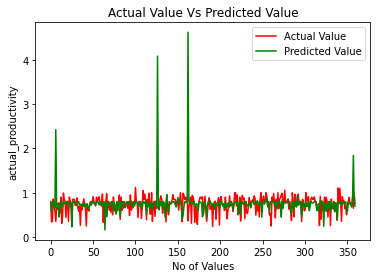

In [63]:
plt.plot(Y_test, color='red', label='Actual Value')
plt.plot(linear_predict, color='green', label='Predicted Value')
plt.title('Actual Value Vs Predicted Value')
plt.xlabel('No of Values')
plt.ylabel('actual_productivity')
plt.legend()
plt.show()

In [64]:
DTree = DecisionTreeRegressor(random_state = 0)

In [65]:
DTree.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [66]:
DTree_predict = DTree.predict(X_test)

In [67]:
DTree.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [68]:
DTree_predict = DTree.predict(X_test)

In [69]:
print(DTree_predict)

[0.66225589 0.60913826 0.75679167 0.99485    0.59061728 0.60029177
 0.44996491 0.664875   0.70061403 0.70277778 0.994375   0.741
 0.99953333 0.57646039 0.70005833 0.93916667 0.85044615 0.80033333
 0.66225589 0.80031343 0.80016117 0.35553448 0.71262626 0.85316919
 0.60036969 0.26369382 0.85050231 0.85050231 0.85061053 0.75034846
 0.75028333 0.92885    0.96369949 0.89955556 0.70051357 0.6825
 0.70009573 0.75065101 0.75065101 1.09663333 0.75064667 0.650134
 0.7        0.75039551 0.65040752 0.602      0.75065172 0.80040196
 0.80646875 0.8        0.60194444 0.65343137 0.75045066 0.70043672
 0.90012976 0.49788506 0.85013677 0.258      0.80040196 0.75025487
 0.80002056 0.97186667 0.75079701 0.81011111 0.50790323 1.00488889
 0.80575    0.75029394 0.80038636 1.0115625  0.985      0.63771186
 0.80031864 0.49998033 0.89155556 0.49788506 0.725625   0.80098039
 0.64057765 0.60023977 0.80025096 0.95018596 0.35020649 0.90021572
 0.60029177 0.80027383 0.96369949 0.79998285 0.63771186 0.7503719
 0.8001

In [70]:
metrics_Cal = evaluate_model('Decision Tree Regressor', Y_test, DTree_predict, metrics_Cal)

C:\Users\supun\AppData\Local\Temp\ipykernel_72\2411393838.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)


In [71]:
# getting R squred error
error_score = metrics.r2_score(Y_test,DTree_predict)
print("R squared Error : ", error_score)

R squared Error :  0.12835540000721835


In [72]:
metrics_Cal

,Model Name,Mean Absolute Error,Mean Squared Error,R2 Squared Error
0,Linear Regression,0.144373,0.125661,-2.804874
1,Decision Tree Regressor,0.095471,0.028787,0.128355


In [73]:
Y_test = list(Y_test)

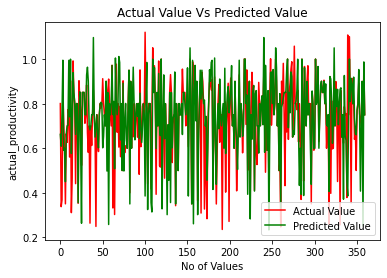

In [74]:
plt.plot(Y_test, color='red', label='Actual Value')
plt.plot(DTree_predict, color='green', label='Predicted Value')
plt.title('Actual Value Vs Predicted Value')
plt.xlabel('No of Values')
plt.ylabel('actual_productivity')
plt.legend()
plt.show()

In [75]:
RModel = RandomForestRegressor(n_estimators = 100)

In [76]:
RModel.fit(X_train,Y_train)

RandomForestRegressor()

In [77]:
RModel_predict = RModel.predict(X_test)

In [78]:
print(RModel_predict)

[0.8001029  0.78504804 0.67899455 0.90982844 0.62607649 0.57585839
 0.39462073 0.69463875 0.68784367 0.67081937 0.90925669 0.66636503
 0.88157253 0.55213036 0.44101208 0.89078735 0.8327324  0.80383542
 0.61373752 0.80501941 0.79758765 0.45589827 0.74762937 0.83209243
 0.55943104 0.35884503 0.8504977  0.84996473 0.85426759 0.75116
 0.7520167  0.78399424 0.83889616 0.84097669 0.72683201 0.67795334
 0.69604303 0.7268417  0.75189313 0.81390002 0.76661512 0.60359352
 0.64162516 0.75626029 0.62835312 0.55031645 0.72207286 0.80039918
 0.79346602 0.80067413 0.8126722  0.72635132 0.73518531 0.69987971
 0.90016314 0.6939594  0.83616964 0.63749314 0.80089683 0.74116146
 0.72737612 0.92065523 0.64622719 0.78894936 0.37359757 0.88339878
 0.70076316 0.69676616 0.80543991 0.7443485  0.92118159 0.61093181
 0.80225095 0.50434567 0.83754663 0.65707505 0.8439946  0.60514372
 0.8012183  0.56210792 0.80058776 0.9607734  0.43482544 0.89078188
 0.62098145 0.80276558 0.81796149 0.80144086 0.6008826  0.7269025

In [79]:
metrics_Cal = evaluate_model('RandomForest Regressor', Y_test, RModel_predict, metrics_Cal)

C:\Users\supun\AppData\Local\Temp\ipykernel_72\2411393838.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)


In [80]:
metrics_Cal

,Model Name,Mean Absolute Error,Mean Squared Error,R2 Squared Error
0,Linear Regression,0.144373,0.125661,-2.804874
1,Decision Tree Regressor,0.095471,0.028787,0.128355
2,RandomForest Regressor,0.074683,0.015032,0.544851


In [81]:
Y_test = list(Y_test)

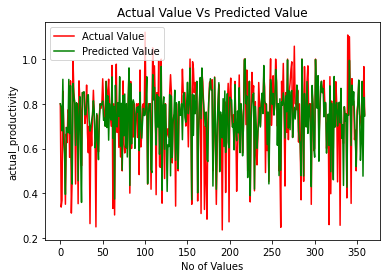

In [82]:
plt.plot(Y_test, color='red', label='Actual Value')
plt.plot(RModel_predict, color='green', label='Predicted Value')
plt.title('Actual Value Vs Predicted Value')
plt.xlabel('No of Values')
plt.ylabel('actual_productivity')
plt.legend()
plt.show()

In [83]:
svModel = SVR(C=25)

In [84]:
svModel.fit(X_train,Y_train)

SVR(C=25)

In [85]:
svModel_predict = svModel.predict(X_test)

In [86]:
metrics_Cal = evaluate_model('Support Vector Regressor', Y_test, svModel_predict, metrics_Cal)

C:\Users\supun\AppData\Local\Temp\ipykernel_72\2411393838.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index = True)


In [87]:
metrics_Cal


,Model Name,Mean Absolute Error,Mean Squared Error,R2 Squared Error
0,Linear Regression,0.144373,0.125661,-2.804874
1,Decision Tree Regressor,0.095471,0.028787,0.128355
2,RandomForest Regressor,0.074683,0.015032,0.544851
3,Support Vector Regressor,0.105072,0.022605,0.315543


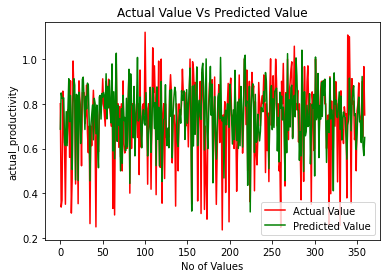

In [88]:
plt.plot(Y_test, color='red', label='Actual Value')
plt.plot(svModel_predict, color='green', label='Predicted Value')
plt.title('Actual Value Vs Predicted Value')
plt.xlabel('No of Values')
plt.ylabel('actual_productivity')
plt.legend()
plt.show()

In [89]:
Summary_metrics = metrics_Cal.drop([], axis=0)

In [90]:
Summary_metrics

,Model Name,Mean Absolute Error,Mean Squared Error,R2 Squared Error
0,Linear Regression,0.144373,0.125661,-2.804874
1,Decision Tree Regressor,0.095471,0.028787,0.128355
2,RandomForest Regressor,0.074683,0.015032,0.544851
3,Support Vector Regressor,0.105072,0.022605,0.315543


In [91]:
plot_dset = Summary_metrics

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Decision Tree Regressor'),
  Text(2, 0, 'RandomForest Regressor'),
  Text(3, 0, 'Support Vector Regressor')])

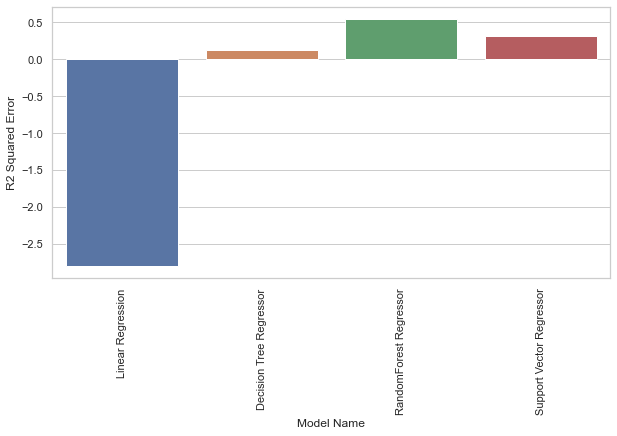

In [92]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Model Name", y="R2 Squared Error", data=plot_dset)
plt.xticks(rotation=90)

In [93]:
input_data = (1,3,0.75,2.9,1190.0,960,0,0.0,0,0)

#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = scaler.transform(input_data_reshaped)

prediction = RModel.predict(input_data_reshaped)
print('Your Productivity =',prediction)

Your Productivity = [0.60611468]


In [94]:
!mkdir saved_models

In [111]:
from joblib import dump

In [112]:
dump(RModel, './saved_models/model.joblib')

['./saved_models/model.joblib']